In [1]:
import pandas as pd
import numpy as np
import math
import struct
import os
import re
import matplotlib.pyplot as plt 
import mdtraj
#required files: mol.csv contains element mass/charge informations

In [2]:
mddir="/media/pangpang/quzhi/GapR_slide_summary/10gc_5at/cmd202110/"
traj=mdtraj.load(mddir+'md_01ns.crd',top=mddir+'md.pdb')[:10000]
top=traj.topology

In [5]:
mddir="/media/pangpang/quzhi/GapR_slide_summary/10at_5gc/cmd2111/"
traj=mdtraj.load(mddir+'md1us.crd',top=mddir+'md.pdb')[:10000]
top=traj.topology

In [6]:
DF=top.select("name P and resid 1 to 20")
DR=top.select("name P and resid 21 to 40")
DNA=top.select("name P and resid 1 to 40")
PA=top.select("name CA and resid 41 to 118")
PB=top.select("name CA and resid 119 to 196")
PC=top.select("name CA and resid 197 to 274")
PD=top.select("name CA and resid 275 to 352")
PAB=top.select("name CA and resid 41 to 196")
PCD=top.select("name CA and resid 197 to 352")
P=top.select("name CA and resid 41 to 352")


In [7]:
data={'PD':mdtraj.compute_distances(traj,np.array([(i,j) for i in DNA for j in P])).std(axis=0)/mdtraj.compute_distances(traj,np.array([(i,j) for i in DNA for j in P])).mean(axis=0),}
pd.DataFrame(data).to_csv('pd.csv')
data={'TETRA':mdtraj.compute_distances(traj,np.array([(i,j) for i in PAB for j in PCD])).std(axis=0)/mdtraj.compute_distances(traj,np.array([(i,j) for i in PAB for j in PCD])).mean(axis=0)}
pd.DataFrame(data).to_csv('tetra.csv')
data={'DIMER1':mdtraj.compute_distances(traj,np.array([(i,j) for i in PA for j in PB])).std(axis=0)/mdtraj.compute_distances(traj,np.array([(i,j) for i in PA for j in PB])).mean(axis=0),}
pd.DataFrame(data).to_csv('di1.csv')
data={'DIMER2':mdtraj.compute_distances(traj,np.array([(i,j) for i in PC for j in PD])).std(axis=0)/mdtraj.compute_distances(traj,np.array([(i,j) for i in PC for j in PD])).mean(axis=0)}
pd.DataFrame(data).to_csv('di2.csv')
data={'DS':mdtraj.compute_distances(traj,np.array([(i,j) for i in DF for j in DR])).std(axis=0)/mdtraj.compute_distances(traj,np.array([(i,j) for i in DF for j in DR])).mean(axis=0),}
pd.DataFrame(data).to_csv('ds.csv')

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f10d2cd2790>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f10d2cd2d60>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f10d2d16280>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f10d2d162e0>}

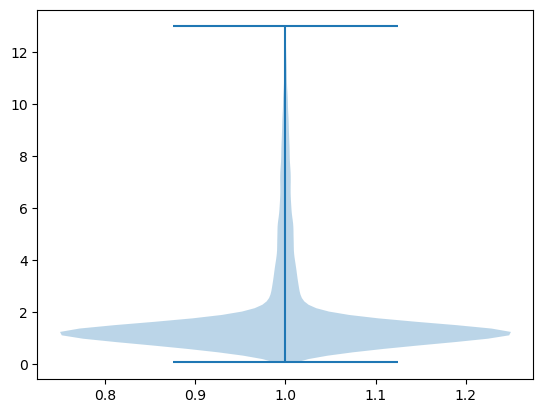

In [8]:
data=mdtraj.compute_distances(traj,np.array([(i,j) for i in PAB for j in PCD]))
plt.violinplot(data.std(axis=0)*10)

In [19]:
#mddir="/media/pangpang/quzhi/GapR_slide_summary/10gc_5at/cmd202110/"
#traj=mdtraj.load(mddir+'md.crd',top=mddir+'md.pdb')
mddir="/media/pangpang/quzhi/GapR_slide_summary/10at_5gc/cmd2111/"
traj=mdtraj.load(mddir+'md5ns.crd',top=mddir+'md.pdb')

top=traj.topology
poly=4
LYSNZ=traj.xyz[:,top.select("name NZ and resname LYS")]
ARGNH=traj.xyz[:,top.select("name NH1 NH2 and resname ARG")]
OP=traj.xyz[:,top.select("name OP1 OP2")]
os.mkdir(mddir+'HBmap')

In [ ]:
LYSRpoint=np.where(LYSdistF[:,30,:]<0.6)
print(LYSRpoint[1])
print(19.5-(LYSRpoint[1]/2).astype('int8'))
print(19.5-(LYSRpoint[1]/2).astype('int8'))
#ax.scatter(LYSFpoint[0],(LYSFpoint[1]/2).astype('int8')+1.5,color='blue',s=100,marker='^')

In [20]:
LYSNZ=top.select("name NZ and resname LYS")
ARGNH=top.select("name NH1 NH2 and resname ARG")
OPF=top.select("name OP1 OP2 and resid 1 to 20")
OPR=top.select("name OP1 OP2 and resid 21 to 40")
LYSpairsF=np.array([(i,j) for i in LYSNZ for j in OPF])
ARGpairsF=np.array([(i,j) for i in ARGNH for j in OPF])
LYSpairsR=np.array([(i,j) for i in LYSNZ for j in OPR])
ARGpairsR=np.array([(i,j) for i in ARGNH for j in OPR])
LYSdistF=mdtraj.compute_distances(traj,LYSpairsF).reshape(len(traj),len(LYSNZ),len(OPF))
LYSdistR=mdtraj.compute_distances(traj,LYSpairsR).reshape(len(traj),len(LYSNZ),len(OPR))
ARGdistF=mdtraj.compute_distances(traj,ARGpairsF).reshape(len(traj),len(ARGNH),len(OPF))
ARGdistR=mdtraj.compute_distances(traj,ARGpairsR).reshape(len(traj),len(ARGNH),len(OPR))
for n,i in enumerate(LYSNZ):
    fig,ax = plt.subplots(figsize=(50,10))
    ax.set_ylim(0,20)
    LYSFpoint=np.where(LYSdistF[:,n,:]<0.6)
    LYSRpoint=np.where(LYSdistR[:,n,:]<0.6)
    ax.scatter(LYSFpoint[0],(LYSFpoint[1]/2).astype('int8')+1.5,color='blue',s=100,marker='^')
    ax.scatter(LYSRpoint[0],19.5-(LYSRpoint[1]/2).astype('int8'),color='blue',s=100,marker='v')
    LYSFpoint=np.where(LYSdistF[:,n,:]<0.35)
    LYSRpoint=np.where(LYSdistR[:,n,:]<0.35)
    ax.scatter(LYSFpoint[0],(LYSFpoint[1]/2).astype('int8')+1.5,color='red',s=250,marker='^')
    ax.scatter(LYSRpoint[0],19.5-(LYSRpoint[1]/2).astype('int8'),color='red',s=250,marker='v')
    plt.xlim(0,200)
    plt.ylim(-1,20)
    plt.xticks(ticks=np.linspace(0,200,11),labels=np.linspace(0,1000,11),fontsize=40) 
    plt.yticks(ticks=np.linspace(0,20,5),labels=[0,5,10,15,20],fontsize=40) 
#   plt.savefig(mddir+'HBmap/'+str(top.atom(i).residue)+'.eps',format='eps')
    plt.savefig(mddir+'HBmap/'+str(top.atom(i).residue)+'.png')
    plt.close()
for n,i in enumerate(ARGNH):
    fig,ax = plt.subplots(figsize=(50,10))
    ax.set_ylim(0,20)
    ARGFpoint=np.where(ARGdistF[:,n,:]<0.6)
    ARGRpoint=np.where(ARGdistR[:,n,:]<0.6)
    ax.scatter(ARGFpoint[0],(ARGFpoint[1]/2).astype('int8')+1.5,color='blue',s=100,marker='^')
    ax.scatter(ARGRpoint[0],19.5-(ARGRpoint[1]/2).astype('int8'),color='blue',s=100,marker='v')
    ARGFpoint=np.where(ARGdistF[:,n,:]<0.35)
    ARGRpoint=np.where(ARGdistR[:,n,:]<0.35)
    ax.scatter(ARGFpoint[0],(ARGFpoint[1]/2).astype('int8')+1.5,color='red',s=250,marker='^')
    ax.scatter(ARGRpoint[0],19.5-(ARGRpoint[1]/2).astype('int8'),color='red',s=250,marker='v')
    plt.xlim(0,200)
    plt.ylim(-1,20)
    plt.xticks(ticks=np.linspace(0,200,11),labels=np.linspace(0,1000,11),fontsize=40) 
    plt.yticks(ticks=np.linspace(0,20,5),labels=[0,5,10,15,20],fontsize=40) 
#   plt.savefig(mddir+'HBmap/'+str(top.atom(i).residue)+'.eps',format='eps')
    plt.savefig(mddir+'HBmap/'+str(top.atom(i).residue)+'.png')
    plt.close()
#    print(np.where(LYSdistF[:,n,:]<0.35))
#for i,n in enumerate(LYSpairs):
#    LYSdist[:,n[0],:]
#fig,ax = plt.subplots(figsize=(50,10))